In [47]:
import pandas as pd
df = pd.read_csv("iris_dataset.csv")
df.sample(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [45]:
# #Mapping
# mapping = {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
# df.Species = df.Species.map(mapping)

In [48]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {'Logistic Regression': lr, 'KNN': knn, 'Naive Bayes': nb}

for name, model in models.items():
    y_pred = model.predict(X)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y, y_pred))
    
    print("cm:", confusion_matrix(y, y_pred))

    print("classification report:", classification_report(y, y_pred))


Logistic Regression
Accuracy: 1.0
cm: [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150


KNN
Accuracy: 0.9933333333333333
cm: [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.98      0.99        50
 Iris-virginica       0.98      1.00      0.99        50

       accuracy                           0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150


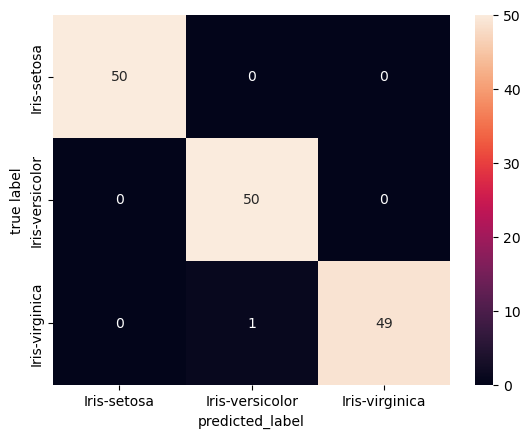

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True, xticklabels=df.Species.unique(), yticklabels=df.Species.unique());
plt.xlabel('predicted_label')
plt.ylabel('true label');